In [1]:
import numpy as np
import pandas as pd

import keras
from keras.layers import (InputLayer,
                          Dense, 
                          Dropout, 
                          Flatten, 
                          Conv2D, 
                          MaxPooling2D, 
                          Reshape, 
                          BatchNormalization)

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from skimage.transform import resize

from matplotlib import pyplot as plt
%matplotlib inline


Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Data
This dataset comes from the  [Digit Recognition Kaggle competition](https://www.kaggle.com/c/digit-recognizer)
which is an ongoing practice competition for getting started with image learning.

The data consists of 28x28 = 782 pixel values for a hand-written digit and a label (0-9) for the digit

In [2]:
df = pd.read_csv('./data/train.csv.gz')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Tensors
A useful conceptual model (and data structure) for image datasets is the n-dimensional array, a.k.a. tensor.
There are muliple ways to represent our dataset as a tensor and different libraries will expect different representations.

## As a two-dimensional array
- Rows (axis 0) are images within the training batch
- Columns (axis 1) are pixel values (grayscale) within an image

This format is closest to the original dataset and is what we would use for logistic regression or a neural network with only dense layers

In [4]:
images_2d = df.drop('label', axis=1).as_matrix() * 1/ 255
print(images_2d)
print(images_2d.shape)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(42000, 784)


## As a three-dimensional array
- Axis 0 indexes images within the training batch
- Axis 1 indexes rows within an image
- Axis 2 indexes pixel values (grayscale) within a row 

We use this format to plot images with matplotlib

(42000, 28, 28)


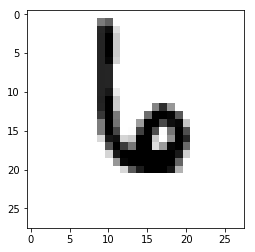

In [5]:
images_3d = images_2d.reshape((len(df), 28, 28))
print(images_3d.shape)
plt.imshow(images_3d[123], cmap='binary')

## As a four-dimensional array
- Axis 0 indexes images within the training batch
- Axis 1 indexes rows within an image
- Axis 2 indexes pixels within a row 
- Axis 3 represents chanels within a pixel
    - Here, axis 3 has only 1 value since images are grayscale
    - Axis 3 could have 3 values for red, green, blue
    - Axis 3 could also have n values for intermediate tensors in a deep network

When using tensorflow for deep learning on images, 4D arrays are the fundamental data structure.

In [6]:
images_4d = images_2d.reshape((len(df), 28, 28, 1))
print(images_4d.shape)

(42000, 28, 28, 1)


In [7]:
labels = df['label'].as_matrix()
train_x, test_x, train_y, test_y = train_test_split(images_4d, labels)

# Challenge
The following model achieves 91% accuracy using logistic regression
``` python
model = keras.models.Sequential([
    InputLayer(input_shape=(28, 28, 1)), 
    Flatten(),
    Dense(10, activation='softmax')
])
```

Using the [Keras documentation](https://keras.io/layers/convolutional/) learn how 
the following layers work and get your accuracy as high as possible.  Bonus points if your solution can identify numbers in the sudoku puzzle.

- [Dense](https://keras.io/layers/core/#dense)
- [Dropout](https://keras.io/layers/core/#dropout)
- [Flatten](https://keras.io/layers/core/#flatten)
- [Conv2D](https://keras.io/layers/convolutional/#conv2d)
- [MaxPooling2D](https://keras.io/layers/pooling/#maxpooling2d)
- [Reshape](https://keras.io/layers/core/#reshape)
- [BatchNormalization](https://keras.io/layers/normalization/#batchnormalization)

You can use the following image for inspiration.  It shows the architecure for LeNet, one of the first successful solutions to this problem.

## LeNet-5

![](./static/lenet-architecture.png)

In [8]:
# model = keras.models.Sequential([
#     InputLayer(input_shape=(28, 28, 1)), 
#     Conv2D(6, (5, 5), padding='same'),
#     MaxPooling2D(),
#     Dropout(0.7),
#     Conv2D(16, (5, 5)),
#     MaxPooling2D(),
#     Dropout(0.7),
#     Flatten(),
#     Dense(120, activation='relu'),
#     Dense(84, activation='relu'),
#     Dense(10, activation='softmax')
# ])

model = keras.models.Sequential([
    InputLayer(input_shape=(28, 28, 1), name='input'), 
    Flatten(name='flatten'),
    Dense(10, activation='softmax', name='dense')
])

model.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=keras.optimizers.Adadelta(),
    metrics=[
        'accuracy'
    ]
)

model.fit(
    train_x, 
    train_y,
    batch_size=64, 
    epochs=10,
    validation_split=0.2,
    callbacks=[
        keras.callbacks.TensorBoard(
            log_dir='./logs/%d' % (pd.datetime.now().timestamp() * 1000), 
            histogram_freq=0, 
            write_graph=True, 
            write_images=True
        )
    ]
)

Train on 25200 samples, validate on 6300 samples
Epoch 1/10
25200/25200 [==============================] - 0s - loss: 1.1406 - acc: 0.7316 - val_loss: 0.6802 - val_acc: 0.8454
Epoch 2/10
25200/25200 [==============================] - 0s - loss: 0.5594 - acc: 0.8655 - val_loss: 0.4877 - val_acc: 0.8744
Epoch 3/10
25200/25200 [==============================] - 0s - loss: 0.4434 - acc: 0.8845 - val_loss: 0.4239 - val_acc: 0.8830
Epoch 4/10
25200/25200 [==============================] - 0s - loss: 0.3957 - acc: 0.8940 - val_loss: 0.3899 - val_acc: 0.8908
Epoch 5/10
25200/25200 [==============================] - 0s - loss: 0.3688 - acc: 0.9015 - val_loss: 0.3699 - val_acc: 0.8960
Epoch 6/10
25200/25200 [==============================] - 0s - loss: 0.3513 - acc: 0.9039 - val_loss: 0.3572 - val_acc: 0.8995
Epoch 7/10
25200/25200 [==============================] - 0s - loss: 0.3386 - acc: 0.9073 - val_loss: 0.3477 - val_acc: 0.9000
Epoch 8/10
25200/25200 [==============================] - 0s -

In [14]:
loss, accuracy = model.test_on_batch(test_x, test_y)
print("loss: %.2f accuracy: %.2f%%" % (loss, accuracy*100))

loss: 0.31 accuracy: 91.07%


In [15]:
sudoku = (255 - plt.imread('./static/sudoku.jpg').mean(axis=2) )

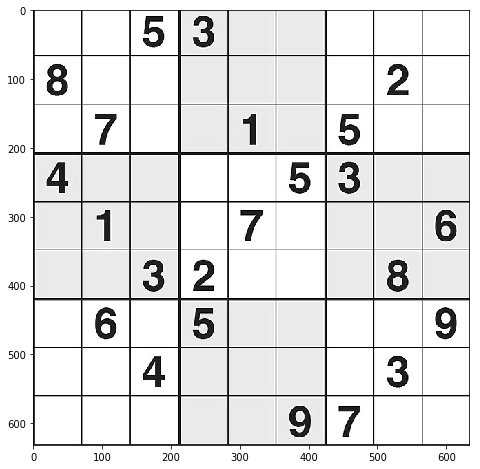

In [16]:
plt.imshow(sudoku, cmap='binary')

In [17]:
def test_model_on_sudoku_puzzle(model, sudoku_puzzle):
    # down-sample to fit model expectations
    sudoku_tensor = resize(sudoku, (28*9, 28*9)).reshape((1, 252, 252, 1))
    
    #build map of predictions
    prediction_map = np.zeros((1, 252, 252, 10))
    for x in range(0, 252, 28):
        for y in range(0, 252, 28):
            view = sudoku_tensor[:,x:x+28, y:y+28,:]
            predictions = model.predict_proba(view, verbose=False).reshape((10))
            for i in range(0, 10):
                prediction_map[0,x:x+28, y:y+28,i] = predictions[i]
    prediction_map.resize((252, 252, 10))
    return prediction_map
    
def plot_sudoku_predictions(prediction_map, digit):
    plt.rcParams['figure.figsize'] = (8, 8)
    plt.grid(True, color='black')
    plt.xticks(range(0, 28*9, 28))
    plt.yticks(range(0, 28*9, 28))
    plt.imshow(prediction_map[:,:,digit], cmap='binary')
    

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


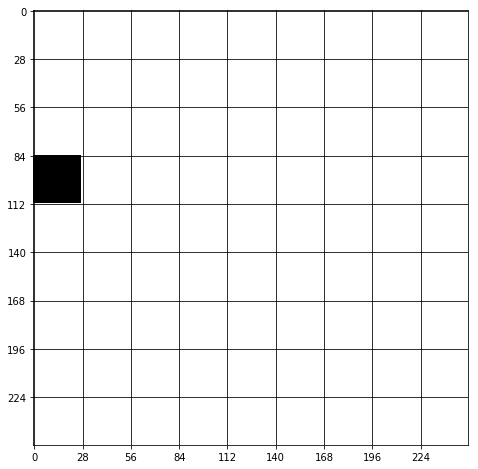

In [18]:
prediction_map = test_model_on_sudoku_puzzle(model, sudoku)
plot_sudoku_predictions(prediction_map, 4)